In [1]:
using DataFrames,CSV
using Plots
using InformationMeasures
using StatsBase
using Statistics
using ScikitLearn
using IJulia
using MLBase
IJulia.installkernel("Julia nodeps", "--depwarn=no")

#models
@sk_import linear_model: LogisticRegression;
@sk_import neighbors:KNeighborsClassifier;
@sk_import tree:DecisionTreeClassifier;
@sk_import svm: SVC;

# utilities
@sk_import model_selection:train_test_split;
@sk_import decomposition:PCA;
@sk_import metrics:confusion_matrix;
@sk_import preprocessing:MinMaxScaler;
@sk_import metrics:f1_score;


┌ Info: Installing Julia nodeps kernelspec in /home/alchemistdude/.local/share/jupyter/kernels/julia-nodeps-1.7
└ @ IJulia /home/alchemistdude/.julia/packages/IJulia/AQu2H/deps/kspec.jl:94
┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore /home/alchemistdude/.julia/packages/ScikitLearn/Kn82b/src/Skcore.jl:169


In [2]:
df = CSV.read("data/sonar.csv",DataFrame,header=0); #Creating dataframe object from csv file
df.Column61 .= replace.(df.Column61, "M" => 1)
df.Column61 .= replace.(df.Column61, "R" => 0);
df.Column61 = parse.(Int, df.Column61);

In [3]:
size(df)

(208, 61)

We have 208 rows and 61 columns, the 61 column is the target feature.

In [4]:
unique!(eltype.(eachcol(df)))

2-element Vector{DataType}:
 Float64
 Int64

It looks like all our data is of float64 type.

In [5]:
df[1:5,:] #head of the dataframe

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598
5,0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564


Summary of the dataframe

In [6]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Column1,0.0291639,0.0015,0.0228,0.1371,,,Float64
2,Column2,0.0384365,0.0006,0.0308,0.2339,,,Float64
3,Column3,0.0438322,0.0015,0.0343,0.3059,,,Float64
4,Column4,0.0538923,0.0058,0.04405,0.4264,,,Float64
5,Column5,0.0752024,0.0067,0.0625,0.401,,,Float64
6,Column6,0.10457,0.0102,0.09215,0.3823,,,Float64
7,Column7,0.121747,0.0033,0.10695,0.3729,,,Float64
8,Column8,0.134799,0.0055,0.1121,0.459,,,Float64
9,Column9,0.178003,0.0075,0.15225,0.6828,,,Float64


Let's check for class imbalance:

In [7]:
countmap(df.Column61)

Dict{Int64, Int64} with 2 entries:
  0 => 97
  1 => 111

It is a little umbalanced, but we can work with that.Now lets look for possible correlations:

In [8]:
corr = cor(Matrix(df))

61×61 Matrix{Float64}:
 1.0       0.735896  0.571537   …  0.357116   0.347078   0.271694
 0.735896  1.0       0.779916      0.3522     0.358761   0.231238
 0.571537  0.779916  1.0           0.425047   0.373948   0.192195
 0.491438  0.606684  0.781786      0.420266   0.400626   0.250638
 0.344797  0.419669  0.546141      0.290982   0.25371    0.222232
 0.238921  0.332329  0.346275   …  0.220573   0.178158   0.132327
 0.260815  0.27904   0.190434      0.183578   0.222493   0.114748
 0.355523  0.334615  0.237884      0.1944     0.146216   0.189314
 0.35342   0.316733  0.252691      0.0972928  0.0952431  0.321448
 0.318276  0.270782  0.219637      0.0582733  0.0973581  0.341142
 0.344058  0.297065  0.27461    …  0.0677261  0.0896953  0.432855
 0.210861  0.194102  0.214807      0.0446137  0.0713637  0.392245
 0.210722  0.249596  0.258767      0.151804   0.0614105  0.312811
 ⋮                              ⋱                        ⋮
 0.269287  0.245868  0.0810956     0.178118   0.139944   0.1

Now lets look for the correlations withe the objective feature:

In [9]:
corr[:,61]

61-element Vector{Float64}:
 0.2716941061552168
 0.23123798457330438
 0.192194745755887
 0.25063845884088126
 0.22223183509528327
 0.13232650383573896
 0.11474838990488473
 0.189314275187784
 0.3214483861926137
 0.3411418488122266
 0.4328549236892342
 0.39224547508336305
 0.31281078441856947
 ⋮
 0.18022415905580047
 0.29320460713370367
 0.2886505526223154
 0.1418711269012208
 0.1826874301454812
 0.09563853711970001
 0.129340554882823
 0.0009328275756250693
 0.18419099614710369
 0.13082593671114393
 0.09005534016567657
 1.0

As we can see there is no strong linear relation with any of the other variables.

Lets scale the data to the range between 0 and 1:

In [131]:
scaler = MinMaxScaler(); 
X = Matrix(df[:,1:60])        
scaler.fit(X)
X = scaler.transform(X)
y = df.Column61;

This is how the data was transformed:

In [132]:
X[1:5,:]

5×60 Matrix{Float64}:
 0.136431   0.156451   0.135677  0.0354256  …  0.185355   0.245179  0.0600462
 0.323009   0.221603   0.272011  0.150024      0.105263   0.140496  0.0877598
 0.182153   0.246892   0.35611   0.243699      0.368421   0.258953  0.166282
 0.0626844  0.0707244  0.199737  0.0349501     0.0938215  0.107438  0.256351
 0.550885   0.282898   0.153088  0.0798859     0.102975   0.292011  0.203233

# Feature Engineering

Now lets try a PCA as the dimension of the input features is high (we have a lot of features), we want the explained variance to be 90%:

In [133]:
pca = PCA(0.9)
pca.fit(X)
X = pca.transform(X); 

In [134]:
size(X)

(208, 20)

After PCA we went from 60 features to 20.Let's look for the explained variance of each component:

In [135]:
for i in 1:size(pca.explained_variance_)[1]
    print("PC ",i," explained varince: ",pca.explained_variance_[i],"\n")
end

PC 1 explained varince: 0.646322657263209
PC 2 explained varince: 0.47302676815043015
PC 3 explained varince: 0.2276890106550276
PC 4 explained varince: 0.16930213730300725
PC 5 explained varince: 0.12531881369532138
PC 6 explained varince: 0.10834117066148884
PC 7 explained varince: 0.09085033750388433
PC 8 explained varince: 0.0798929302483566
PC 9 explained varince: 0.06958770605326242
PC 10 explained varince: 0.05663931459549415
PC 11 explained varince: 0.04305154756636985
PC 12 explained varince: 0.040990205997998415
PC 13 explained varince: 0.03810358797479776
PC 14 explained varince: 0.03569533219639561
PC 15 explained varince: 0.02961935837071004
PC 16 explained varince: 0.02859170458243226
PC 17 explained varince: 0.026008305418597406
PC 18 explained varince: 0.02414041136736177
PC 19 explained varince: 0.022224298780182703
PC 20 explained varince: 0.02100191229117213


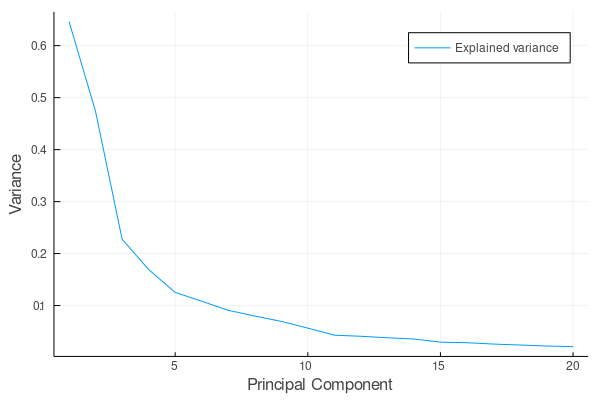

In [136]:
default(fmt = :png)
plot([i for i in 1:20],pca.explained_variance_,label="Explained variance",xlabel="Principal Component",ylabel="Variance")

As we can see using the elbow method there is a big drop in proportion of variance explained between the principal component 3 and principal component 4, we'd likely include the first three features and drop the remaining features.

In [137]:
X =X[:,1:3];

Splitting into train,test and validation sets:

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9,random_state=66)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.85,random_state=66);

In [139]:
print("Train -> ",size(X_train),"\n")
print("Test -> ",size(X_test),"\n")
print("Validation -> ",size(X_valid),"\n")

Train -> (158, 3)
Test -> (21, 3)
Validation -> (29, 3)


In [140]:
function interpret_cm(m)
    print("Rocks labeled as rocks: ",m[1,1])
    print("\nRocks labeled as mines: ",m[1,2])
    print("\nMines labeled as rocks: ",m[2,1])
    print("\nMines labeled as mines: ",m[2,2])
end
    

interpret_cm (generic function with 1 method)

# Logistic Regression

In [141]:
model_log = LogisticRegression();
model_log.fit(X_train,y_train);
predicted_log = model_log.predict(X_valid);

In [142]:
interpret_cm(confusion_matrix(y_valid,predicted_log))

Rocks labeled as rocks: 13
Rocks labeled as mines: 3
Mines labeled as rocks: 4
Mines labeled as mines: 9

In [143]:
f1_log = f1_score(y_valid,predicted_log)

0.7199999999999999

We have this base model with f1 score of 0.72

# KNN

In [183]:
model_knn = KNeighborsClassifier();
model_knn.fit(X_train,y_train);
predicted_knn = model_knn.predict(X_valid);

In [184]:
interpret_cm(confusion_matrix(y_valid,predicted_knn))

Rocks labeled as rocks: 12
Rocks labeled as mines: 4
Mines labeled as rocks: 6
Mines labeled as mines: 7

In [185]:
f1 = f1_score(y_valid,predicted_knn)

0.5833333333333334

We have this base model with f1 score of 0.58, lets tune number of neighbors hyperparameter:

In [147]:
neighbors = [3,5,7,9,11,14,15,17,19];

In [148]:
f1_knn = 0
for i in neighbors
    model_knn = KNeighborsClassifier(n_neighbors=i);
    model_knn.fit(X_train,y_train);
    predicted_knn = model_knn.predict(X_valid);
    f1 = f1_score(y_valid,predicted_knn)
    
    print("Number of neigbors: ",i," |F1 score: ",f1, "\n")
    
    if f1>f1_knn
        f1_knn = f1
    end
end

Number of neigbors: 3 |F1 score: 0.6956521739130435
Number of neigbors: 5 |F1 score: 0.5833333333333334
Number of neigbors: 7 |F1 score: 0.64
Number of neigbors: 9 |F1 score: 0.6956521739130435
Number of neigbors: 11 |F1 score: 0.6363636363636364
Number of neigbors: 14 |F1 score: 0.608695652173913
Number of neigbors: 15 |F1 score: 0.6153846153846154
Number of neigbors: 17 |F1 score: 0.6923076923076923
Number of neigbors: 19 |F1 score: 0.7407407407407408


So our best knn model is with 3 neighbors:

In [168]:
model_knn = KNeighborsClassifier(n_neighbors=3);
model_knn.fit(X_train,y_train);

# Decision Tree Classifier

In [150]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,y_train);
predicted_dtc = model_dtc.predict(X_valid);

In [151]:
interpret_cm(confusion_matrix(y_valid,predicted_dtc))

Rocks labeled as rocks: 13
Rocks labeled as mines: 3
Mines labeled as rocks: 7
Mines labeled as mines: 6

In [152]:
f1 = f1_score(y_valid,predicted_dtc)

0.5454545454545455

Base model with default parameters has 0.54 f1 score.

Lets try different hyperparameters:

In [153]:
mx = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
ms = [2,3,4,5];

In [186]:
f1_dtc=0
best_j=0
best_i = 0

for i in mx
    for j in ms
        
        model_dtc = DecisionTreeClassifier(max_depth = i, min_samples_split = j)
        model_dtc.fit(X_train,y_train);
        predicted_dtc = model_dtc.predict(X_valid);
        f1 = f1_score(y_valid,predicted_dtc)
        
        print("Max Depth: ",i," |min_samples_split: ",j," |F1 score: ",f1, "\n")
        
        if f1>f1_dtc
            f1_dtc = f1
            best_i = i
            best_j = j

        end

            
    end
end
print("Best model --> Max Depth: ",best_i," |min_samples_split: ",best_j,"| F1 score: ",f1_dtc)    

Max Depth: 1 |min_samples_split: 2 |F1 score: 0.761904761904762
Max Depth: 1 |min_samples_split: 3 |F1 score: 0.761904761904762
Max Depth: 1 |min_samples_split: 4 |F1 score: 0.761904761904762
Max Depth: 1 |min_samples_split: 5 |F1 score: 0.761904761904762
Max Depth: 2 |min_samples_split: 2 |F1 score: 0.7272727272727274
Max Depth: 2 |min_samples_split: 3 |F1 score: 0.7272727272727274
Max Depth: 2 |min_samples_split: 4 |F1 score: 0.7272727272727274
Max Depth: 2 |min_samples_split: 5 |F1 score: 0.7272727272727274
Max Depth: 3 |min_samples_split: 2 |F1 score: 0.5263157894736842
Max Depth: 3 |min_samples_split: 3 |F1 score: 0.5263157894736842
Max Depth: 3 |min_samples_split: 4 |F1 score: 0.5263157894736842
Max Depth: 3 |min_samples_split: 5 |F1 score: 0.5263157894736842
Max Depth: 4 |min_samples_split: 2 |F1 score: 0.5599999999999999
Max Depth: 4 |min_samples_split: 3 |F1 score: 0.5599999999999999
Max Depth: 4 |min_samples_split: 4 |F1 score: 0.5599999999999999
Max Depth: 4 |min_samples_spl

Therefore our best decision tree model is with 6 of max depth and 2 min samples split.

In [187]:
model_dtc = DecisionTreeClassifier(max_depth = 6, min_samples_split = 2)
model_dtc.fit(X_train,y_train);

# SVM

In [156]:
model_svc = SVC();
model_svc.fit(X_train,y_train);
predicted_svc = model_svc.predict(X_valid);

In [157]:
interpret_cm(confusion_matrix(y_valid,predicted_svc))

Rocks labeled as rocks: 13
Rocks labeled as mines: 3
Mines labeled as rocks: 3
Mines labeled as mines: 10

In [158]:
f1 = f1_score(y_valid,predicted_svc)

0.7692307692307693

We have this base model with f1 score of 0.77

In [188]:
g = ["scale","auto"]
cv = [1,2,3,4,5,6,7,8];

In [189]:
f1_svm = 0
best_c = 0

for j in g
    for i in cv
        model_svc = SVC(gamma=j,C=i);
        model_svc.fit(X_train,y_train);
        predicted_svc = model_svc.predict(X_valid);
        f1 = f1_score(y_valid,predicted_svc)

        print("Gamma = ",j," C = ",i," F1 = ",f1, "\n")

        if f1>f1_svm
            f1_svm = f1
            best_c=i
        end
    end
end
    


Gamma = scale C = 1 F1 = 0.7692307692307693
Gamma = scale C = 2 F1 = 0.6923076923076923
Gamma = scale C = 3 F1 = 0.64
Gamma = scale C = 4 F1 = 0.6666666666666667
Gamma = scale C = 5 F1 = 0.6666666666666667
Gamma = scale C = 6 F1 = 0.6666666666666667
Gamma = scale C = 7 F1 = 0.6666666666666667
Gamma = scale C = 8 F1 = 0.6666666666666667
Gamma = auto C = 1 F1 = 0.7500000000000001
Gamma = auto C = 2 F1 = 0.7500000000000001
Gamma = auto C = 3 F1 = 0.7199999999999999
Gamma = auto C = 4 F1 = 0.7199999999999999
Gamma = auto C = 5 F1 = 0.7199999999999999
Gamma = auto C = 6 F1 = 0.7199999999999999
Gamma = auto C = 7 F1 = 0.7199999999999999
Gamma = auto C = 8 F1 = 0.7199999999999999


In [190]:
model_svm = SVC(gamma="scale",C=1);
model_svm.fit(X_train,y_train);
predicted_svm = model_svc.predict(X_valid);
f1_svm = f1_score(y_valid,predicted_svc)

0.7199999999999999

# Choosing best model

## Logistic regression

In [170]:
print("|F1 score|\n")
print("On test set: ",f1_score(model_log.predict(X_test),y_test))
print("\nOn validation set: ",f1_log)

|F1 score|
On test set: 0.7407407407407406
On validation set: 0.7199999999999999

In [171]:
print("|Confusion Matrix on test set|\n")
interpret_cm(confusion_matrix(y_test,model_log.predict(X_test)))

print("\n\n|Confusion Matrix on validation set|\n")
interpret_cm(confusion_matrix(y_valid,predicted_log))

|Confusion Matrix on test set|
Rocks labeled as rocks: 4
Rocks labeled as mines: 1
Mines labeled as rocks: 6
Mines labeled as mines: 10

|Confusion Matrix on validation set|
Rocks labeled as rocks: 13
Rocks labeled as mines: 3
Mines labeled as rocks: 4
Mines labeled as mines: 9

## KNN

In [172]:
print("|F1 score|\n")
print("On test set: ",f1_score(model_knn.predict(X_test),y_test))
print("\nOn validation set: ",f1_knn)


|F1 score|
On test set: 0.6666666666666666
On validation set: 0.7407407407407408

In [173]:
print("|Confusion Matrix on test set|\n")
interpret_cm(confusion_matrix(y_test,model_knn.predict(X_test)))

print("\n\n|Confusion Matrix on validation set|\n")
interpret_cm(confusion_matrix(y_valid,predicted_knn))

|Confusion Matrix on test set|
Rocks labeled as rocks: 3
Rocks labeled as mines: 2
Mines labeled as rocks: 7
Mines labeled as mines: 9

|Confusion Matrix on validation set|
Rocks labeled as rocks: 12
Rocks labeled as mines: 4
Mines labeled as rocks: 3
Mines labeled as mines: 10

## Decision Tree

In [174]:
print("|F1 score|\n")
print("On test set:",f1_score(model_dtc.predict(X_test),y_test))
print("\nOn validation set: ",f1_dtc)

|F1 score|
On test set:0.7407407407407406
On validation set: 0.761904761904762

In [176]:
print("|Confusion Matrix on test set|\n")
interpret_cm(confusion_matrix(y_test,model_dtc.predict(X_test)))

print("\n\n|Confusion Matrix on validation set|\n")
interpret_cm(confusion_matrix(y_valid,predicted_dtc))

|Confusion Matrix on test set|
Rocks labeled as rocks: 4
Rocks labeled as mines: 1
Mines labeled as rocks: 6
Mines labeled as mines: 10

|Confusion Matrix on validation set|
Rocks labeled as rocks: 13
Rocks labeled as mines: 3
Mines labeled as rocks: 7
Mines labeled as mines: 6

## SVM

In [179]:
print("On test set: ",f1_score(model_svc.predict(X_test),y_test))
print("\nOn validation set: ",f1_svm)

On test set: 0.8148148148148148
On validation set: 0.7692307692307693

In [182]:
print("|Confusion Matrix on test set|\n")
interpret_cm(confusion_matrix(y_test,model_svm.predict(X_test)))

print("\n\n|Confusion Matrix on validation set|\n")
interpret_cm(confusion_matrix(y_valid,predicted_svm))

|Confusion Matrix on test set|
Rocks labeled as rocks: 5
Rocks labeled as mines: 0
Mines labeled as rocks: 5
Mines labeled as mines: 11

|Confusion Matrix on validation set|
Rocks labeled as rocks: 13
Rocks labeled as mines: 3
Mines labeled as rocks: 3
Mines labeled as mines: 10

The best model is the decision tree clasifier as it is not overfitted and has the high f1 score.If we were trying to minimize mines labeled as rocks the best model is SVM.